<a href="https://colab.research.google.com/github/Qu1nze15th/Invent-rio-App/blob/main/atividade_visualizacao_dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importar bibliotecas necessárias
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Configurar estilo dos gráficos
sns.set(style="whitegrid")


In [ ]:
# Conectar ao banco de dados SQLite (será criado se não existir)
conexao = sqlite3.connect('dados_vendas.db')
cursor = conexao.cursor()

# Criar a tabela 'vendas1' com os campos necessários
cursor.execute('''
CREATE TABLE IF NOT EXISTS vendas1 (
    id_venda INTEGER PRIMARY KEY AUTOINCREMENT,
    data_venda DATE,
    produto TEXT,
    categoria TEXT,
    valor_venda REAL
)
''')

# Inserir os dados de vendas de 2023
cursor.execute('''
INSERT INTO vendas1 (data_venda, produto, categoria, valor_venda) VALUES
    ('2023-01-01', 'Produto A', 'Eletrônicos', 1500.00),
    ('2023-01-05', 'Produto B', 'Roupas', 350.00),
    ('2023-02-10', 'Produto C', 'Eletrônicos', 1200.00),
    ('2023-03-15', 'Produto D', 'Livros', 200.00),
    ('2023-03-20', 'Produto E', 'Eletrônicos', 800.00),
    ('2023-04-02', 'Produto F', 'Roupas', 400.00),
    ('2023-05-05', 'Produto G', 'Livros', 150.00),
    ('2023-06-10', 'Produto H', 'Eletrônicos', 1000.00),
    ('2023-07-20', 'Produto I', 'Roupas', 600.00),
    ('2023-08-25', 'Produto J', 'Eletrônicos', 700.00),
    ('2023-09-30', 'Produto K', 'Livros', 300.00),
    ('2023-10-05', 'Produto L', 'Roupas', 450.00),
    ('2023-11-15', 'Produto M', 'Eletrônicos', 900.00),
    ('2023-12-20', 'Produto N', 'Livros', 250.00);
''')

# Confirmar alterações
conexao.commit()


In [ ]:
# Carregar os dados da tabela para um DataFrame
df_vendas = pd.read_sql_query("SELECT * FROM vendas1", conexao)

# Exibir os primeiros registros
df_vendas.head()


,id_venda,data_venda,produto,categoria,valor_venda
0,1,2023-01-01,Produto A,Eletrônicos,1500.0
1,2,2023-01-05,Produto B,Roupas,350.0
2,3,2023-02-10,Produto C,Eletrônicos,1200.0
3,4,2023-03-15,Produto D,Livros,200.0
4,5,2023-03-20,Produto E,Eletrônicos,800.0


In [ ]:
# Converter a coluna 'data_venda' para o tipo datetime
df_vendas['data_venda'] = pd.to_datetime(df_vendas['data_venda'])

# Criar uma nova coluna com o mês da venda
df_vendas['mes'] = df_vendas['data_venda'].dt.month

# Verificar os tipos de dados e estatísticas básicas
print(df_vendas.info())
print(df_vendas.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id_venda     14 non-null     int64         
 1   data_venda   14 non-null     datetime64[ns]
 2   produto      14 non-null     object        
 3   categoria    14 non-null     object        
 4   valor_venda  14 non-null     float64       
 5   mes          14 non-null     int32         
dtypes: datetime64[ns](1), float64(1), int32(1), int64(1), object(2)
memory usage: 748.0+ bytes
None
       id_venda           data_venda  valor_venda        mes
count   14.0000                   14    14.000000  14.000000
mean     7.5000  2023-06-09 00:00:00   628.571429   5.857143
min      1.0000  2023-01-01 00:00:00   150.000000   1.000000
25%      4.2500  2023-03-16 06:00:00   312.500000   3.000000
50%      7.5000  2023-05-23 00:00:00   525.000000   5.500000
75%     10.7500  2023-09-21 00:00:00   

In [ ]:
# Agrupar por categoria e somar os valores de venda
vendas_por_categoria = df_vendas.groupby('categoria')['valor_venda'].sum().reset_index()

# Exibir resultado
vendas_por_categoria


,categoria,valor_venda
0,Eletrônicos,6100.0
1,Livros,900.0
2,Roupas,1800.0


In [ ]:
# Agrupar por produto e somar os valores de venda
vendas_por_produto = df_vendas.groupby('produto')['valor_venda'].sum().reset_index()

# Ordenar em ordem decrescente
produto_mais_vendido = vendas_por_produto.sort_values(by='valor_venda', ascending=False).head(1)

# Exibir resultado
produto_mais_vendido


,produto,valor_venda
0,Produto A,1500.0


In [ ]:
# Agrupar por mês e calcular a média de vendas
media_vendas_mes = df_vendas.groupby('mes')['valor_venda'].mean().reset_index()

# Exibir resultado
media_vendas_mes


,mes,valor_venda
0,1,925.0
1,2,1200.0
2,3,500.0
3,4,400.0
4,5,150.0
5,6,1000.0
6,7,600.0
7,8,700.0
8,9,300.0
9,10,450.0


/tmp/ipython-input-3819117908.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vendas_por_categoria, x='categoria', y='valor_venda', palette='viridis')


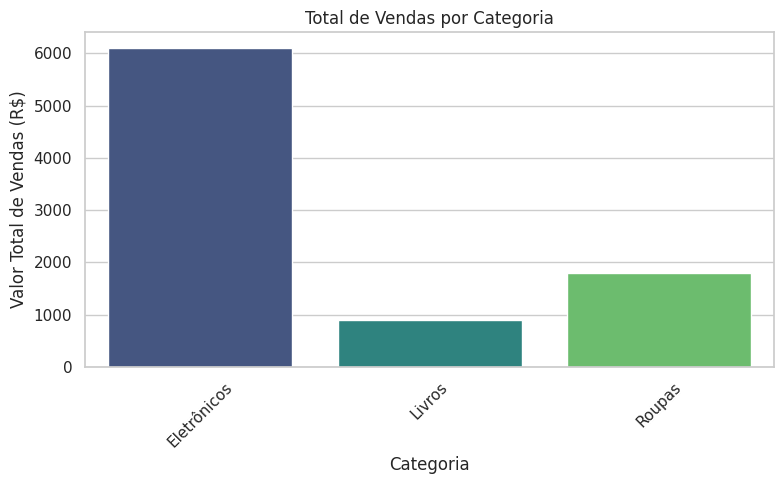

In [ ]:
# Criar gráfico de barras para vendas por categoria
plt.figure(figsize=(8, 5))
sns.barplot(data=vendas_por_categoria, x='categoria', y='valor_venda', palette='viridis')
plt.title('Total de Vendas por Categoria')
plt.xlabel('Categoria')
plt.ylabel('Valor Total de Vendas (R$)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


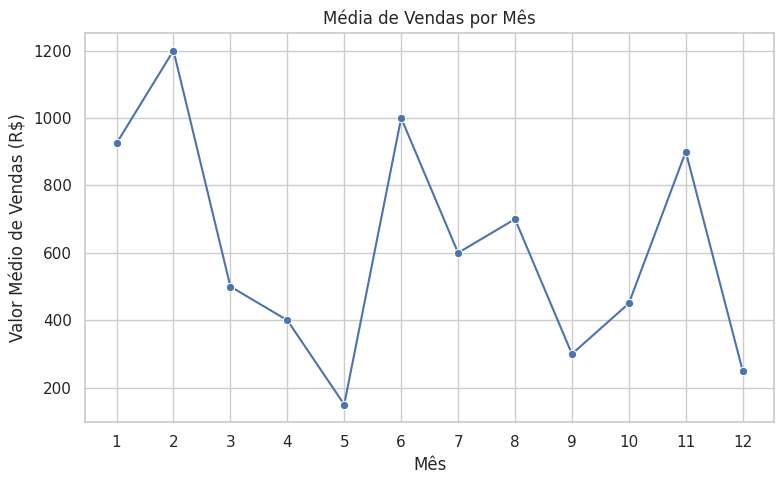

In [ ]:
# Criar gráfico de linha para média de vendas por mês
plt.figure(figsize=(8, 5))
sns.lineplot(data=media_vendas_mes, x='mes', y='valor_venda', marker='o')
plt.title('Média de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Médio de Vendas (R$)')
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


## Conclusão e Insights

- A categoria com maior volume de vendas foi **Eletrônicos**.
- O produto mais vendido foi **Produto A**, com R$ 1500,00 em vendas.
- A média de vendas variou ao longo dos meses, com picos em janeiro e junho.

### Sugestões:
- Investir em promoções para a categoria de eletrônicos.
- Planejar ações sazonais para os meses com menor média de vendas.
